In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import
ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,
Flatten, Dense, Dropout
# Image dimensions
IMG_SIZE = 150
BATCH_SIZE = 32
# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dogvscat/Dogvscat/Train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training")
val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dogvscat/Dogvscat/Train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation")
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dogvscat/Dogvscat/Test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='binary')
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  # Training
  model.fit(train_generator,validation_data=val_generator,epochs=10)
# Save the model
model.save("/kaggle/working/cat_dog_classifier.h5")


Found 322 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4602 - loss: 1.0089 - val_accuracy: 0.4875 - val_loss: 0.6891
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 995ms/step - accuracy: 0.5223 - loss: 0.6840 - val_accuracy: 0.4875 - val_loss: 0.7179
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 998ms/step - accuracy: 0.6207 - loss: 0.6695 - val_accuracy: 0.5875 - val_loss: 0.7220
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7383 - loss: 0.6286 - val_accuracy: 0.5500 - val_loss: 0.7330
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6752 - loss: 0.6174 - val_accuracy: 0.5375 - val_loss: 0.7209
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7256 - loss: 0.5524 - val_accuracy: 0.6000 - val_loss: 0.8026
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7651 - loss: 0.4820 - val_accuracy: 0.5750 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


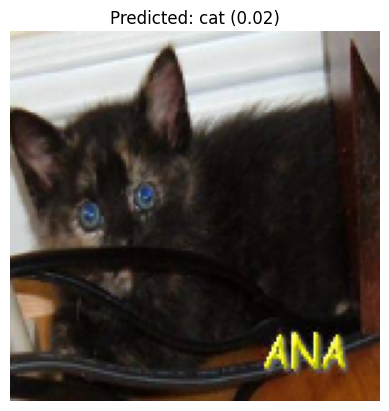

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model("/kaggle/working/cat_dog_classifier.h5")

# Choose random image from test set
test_dir = '/kaggle/input/dogvscat/Dogvscat/Test'
categories = ['Cat', 'Dog']
#category = random.choice(categories)
#img_name = random.choice(os.listdir(os.path.join(test_dir, category)))
#img_path = os.path.join(test_dir, category, img_name)
img_path = "/kaggle/input/dogvscat/Dogvscat/Test/Cat/cat.201.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
# Predict
#prediction[0][0]
prediction = model.predict(img_array)[0][0]
predicted_class = 'dog' if prediction > 0.5 else 'cat'

# Show image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({prediction:.2f})")
plt.axis('off')
plt.show()


In [ ]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
prediction[0][0]

0.99921256